# Associate the STA/LTA detections

In [1]:
# Import modules

from os.path import join
from pandas import read_csv
from utils_sta_lta import ROOTDIR, merge_station_detections, associate_detections, bin_events_by_hour, plot_station_hourly_detections
from matplotlib.pyplot import show

SyntaxError: trailing comma not allowed without surrounding parentheses (2993029423.py, line 6)

In [ ]:
# Inputs
numdet_min = 8 # Minimum number of detections to claim an event
delta_max = 0.2 # Maximum time difference to associate detections

snrflag = True # Use signal-to-noise ratio to filter detections
minsnr = 1.0 # Minimum signal-to-noise ratio

stapath = join(ROOTDIR, "stations_sta_lta.csv")
indir = join(ROOTDIR, "detections_sta0.01s_lta0.20s_on10_off2")

In [ ]:
# Read the number of detections per hour for all stations
inpath = join(indir, "hourly_detection_numbers.csv")

stadetnum_df = read_csv(inpath, parse_dates=["hour"])

In [ ]:
# Read the station detections
stadf = read_csv(stapath, index_col=0)

stadet_dict = {}
for station in stadf["name"]:
    inpath = join(indir, f"{station}.csv")
    try:
        stadet_dict[station] = read_csv(inpath, index_col=0, parse_dates=["trigger_time", "detrigger_time"])
    except FileNotFoundError:
        print(f"File not found: {inpath}")

    print(f"Read {inpath}")

Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A01.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A02.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A03.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A04.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A05.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A06.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A07.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A08.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A09.csv
Read /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/A10.csv
Read /Volumes/OmanData/geophones_no_pref

In [ ]:
# Merge the station detections
detdf_a, detdf_b = merge_station_detections(stadet_dict)

Total number of detections to associate: 1553261 (A) and 985477 (B).


In [ ]:
# Associate the detections
print("Associating the detections for Subarray A...")
events_a = associate_detections(detdf_a, numdet_min=numdet_min, delta_max=delta_max, use_snr=snrflag, min_snr=minsnr)

print("Associating the detections for Subarray B...")
events_b = associate_detections(detdf_b, numdet_min=numdet_min, delta_max=delta_max, use_snr=snrflag, min_snr=minsnr)

Associating the detections for Subarray A...
There are in total 27534 associated events.
Associating the detections for Subarray B...
There are in total 8900 associated events.


In [ ]:
# import importlib
# import utils_sta_lta
# importlib.reload(utils_sta_lta)

# # Bin the events by hour

# countdf_a = utils_sta_lta.bin_events_by_hour(events_a)
# countdf_b = utils_sta_lta.bin_events_by_hour(events_b)

countdf_a = bin_events_by_hour(events_a)
countdf_b = bin_events_by_hour(events_b)


                           count
hour                            
2020-01-10 11:00:00+00:00    114
2020-01-10 12:00:00+00:00    151
2020-01-10 13:00:00+00:00    291
2020-01-10 14:00:00+00:00    142
2020-01-10 15:00:00+00:00      0
...                          ...
2020-02-01 07:00:00+00:00   1603
2020-02-01 08:00:00+00:00    511
2020-02-01 09:00:00+00:00    449
2020-02-01 10:00:00+00:00    427
2020-02-01 11:00:00+00:00      3

[529 rows x 1 columns]


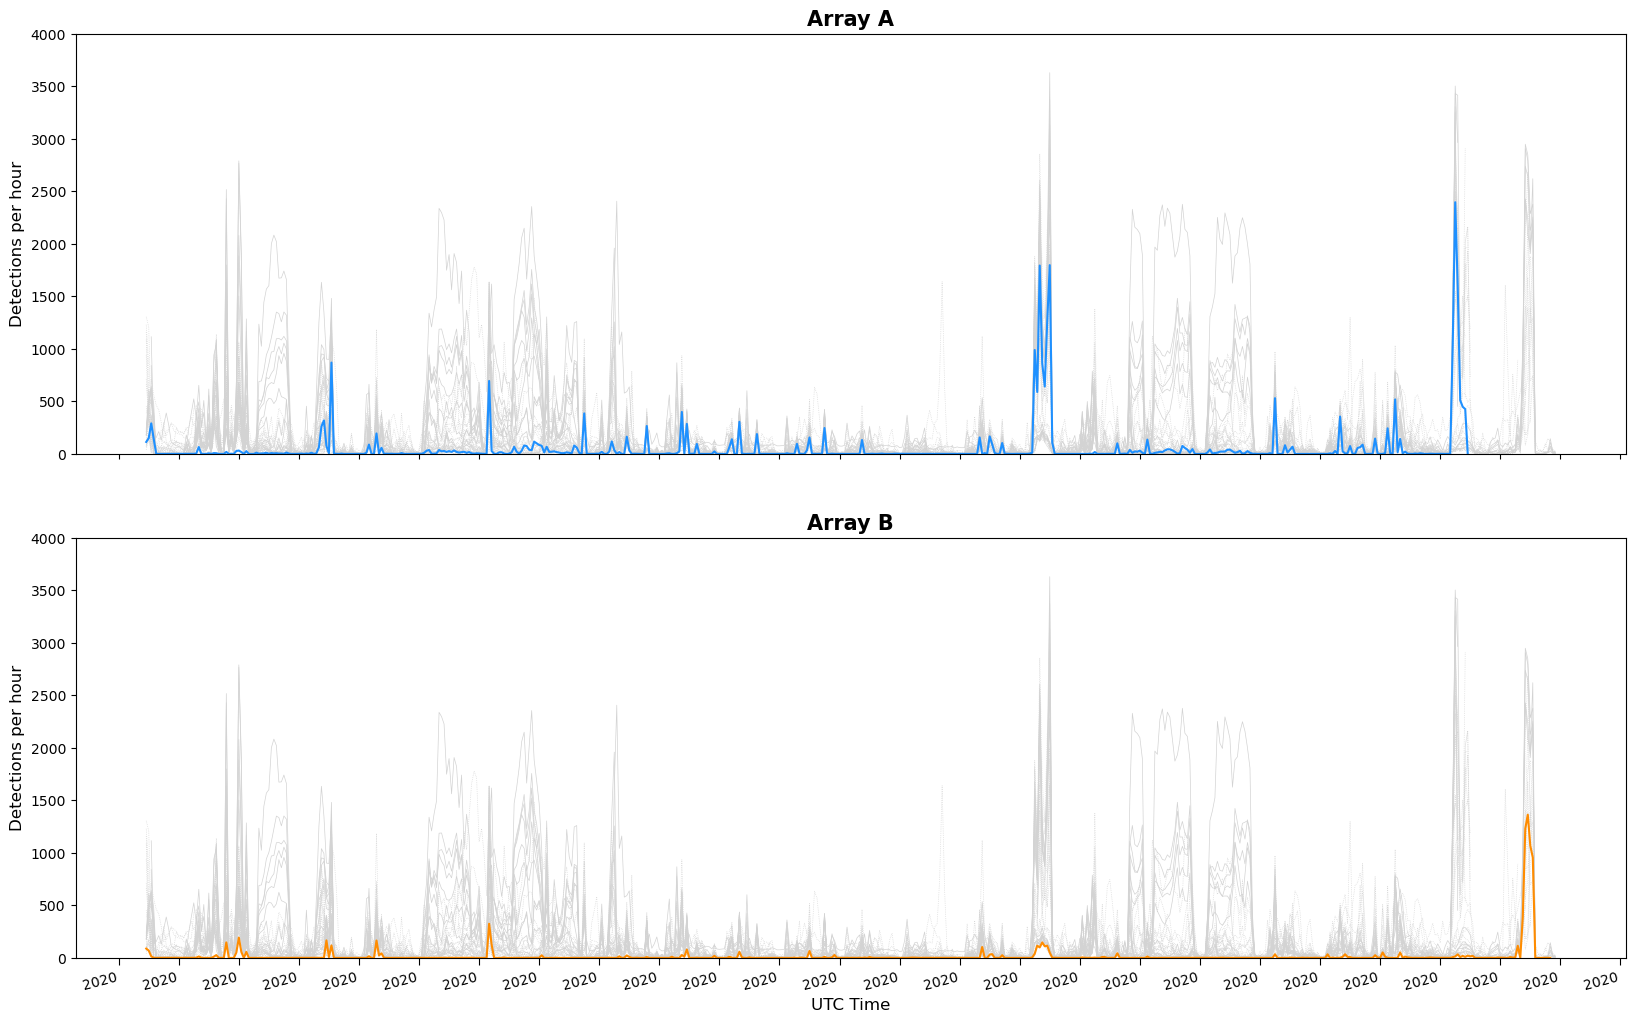

In [ ]:
fig, axes = plot_station_hourly_detections(stadetnum_df, individual_color=False)
axes[0].plot(countdf_a.index, countdf_a["count"], color="dodgerblue", label="Subarray A")
axes[1].plot(countdf_b.index, countdf_b["count"], color="darkorange", label="Subarray B")

# for label in axes[1].get_xticklabels():
#     label.set_va('top')  # Vertical alignment for y-axis label
#     label.set_ha('right')
#     label.set_rotation(15)
#     label.set_fontsize(10)

show()